#### Detection

#### IQR

![](https://www.researchgate.net/publication/340969321/figure/fig2/AS:885273386811393@1588077031036/Interquartile-range-IQR-projection-on-a-normally-distributed-density-The-median-of-IQR.jpg)

Why multiplied by 1.5?

**The Empirical Rule:** In the normal distribution, approximately 68% of the data falls within one standard deviation from the mean, 95% falls within two standard deviations, and 99.7% falls within three standard deviations. This pattern, known as the empirical rule or the 68-95-99.7 rule, provides a basis for understanding the expected range of data points in a normal distribution. 

**Sensitivity and Stringency:** The choice of a multiplier in the IQR method determines the stringency of the outlier detection. A smaller multiplier would result in tighter outlier thresholds, capturing only extreme outliers. Conversely, a larger multiplier would yield wider outlier thresholds, encompassing a broader range of observations as outliers. By using a multiplier of 1.5, the IQR method strikes a balance between sensitivity and stringency. It identifies outliers that deviate approximately 1.5 times the IQR away from the upper or lower quartiles, capturing significant deviations from the expected range without being overly stringent or overly permissive.

**Convenience:** If you see in the image above, 1.5 as a multiplier does not quite represent 3 standard deviations. In a normally distributed data this value should be 1.7. However, 1.5 seems to be a more rounded value.

In [1]:
import pandas as pd
df = pd.read_csv("lecture6/file.csv", usecols = ["LotArea","SalePrice"])


In [2]:
q1 = df["SalePrice"].quantile(0.25)
q3 = df["SalePrice"].quantile(0.75)

IQR = q3 - q1
print(f"q1 : {q1}")
print(f"q3 : {q3}")
print(f"IQR : {IQR}")

q1 : 129975.0
q3 : 214000.0
IQR : 84025.0


In [3]:
lower_whisker = q1 - (1.5 * IQR)
upper_whisker = q3 + (1.5 * IQR)
print(f"lower whisker : {lower_whisker}")
print(f"upper whisker : {upper_whisker}")

lower whisker : 3937.5
upper whisker : 340037.5


In [4]:
print((df["SalePrice"]<lower_whisker) | (df["SalePrice"]>upper_whisker))

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool


In [5]:
new_df = df[(df["SalePrice"]>lower_whisker) & (df["SalePrice"]<upper_whisker)]


#### Visualization

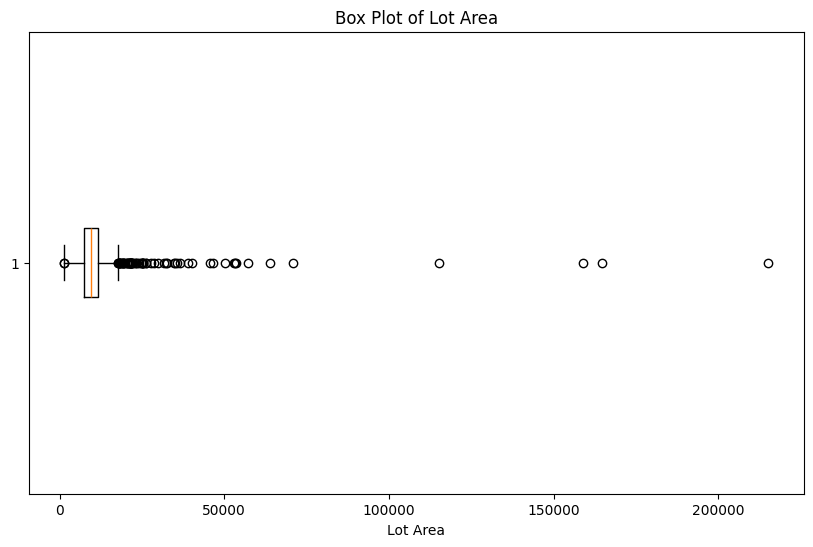

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(df["LotArea"], vert=False)
plt.xlabel("Lot Area")
plt.title("Box Plot of Lot Area")
plt.show()

**Histogram**

<Axes: >

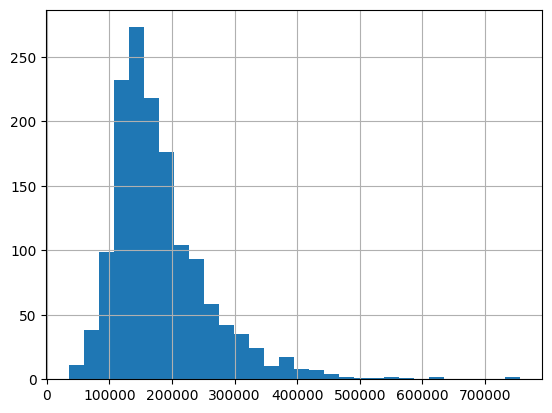

In [7]:
df.SalePrice.hist(bins=30)

The chart shows that the distribution is right-skewed, and there are extreme higher values at the right of the histogram.


**Scatter plot**

Text(0, 0.5, 'Sales Price')

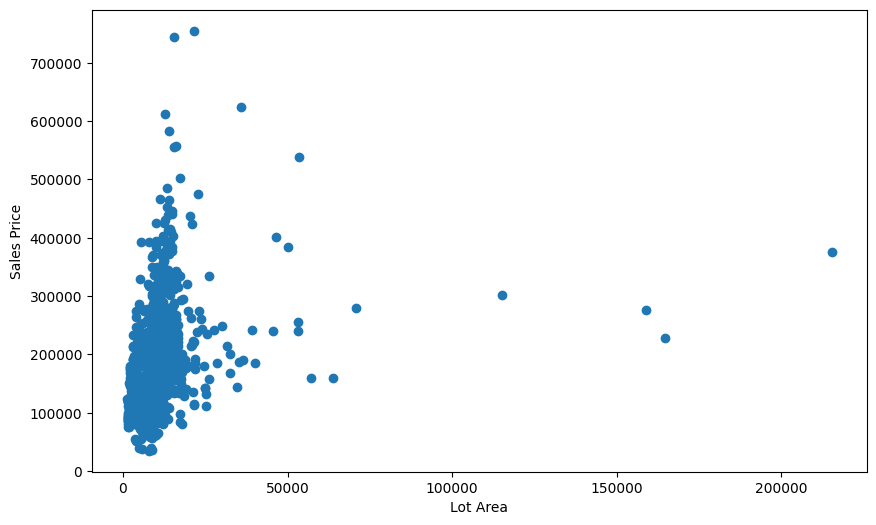

In [8]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df["LotArea"],df["SalePrice"])
ax.set_xlabel("Lot Area")
ax.set_ylabel("Sales Price")

- The chart indicates that most of the data points are clustered in the lower half of the plot.

- The points located to the extreme right of the x-axis or the y-axis indicate outliers.


### Removal

**Quantile based Flooring and Capping**

- flooring ( bottom 1%) lower values and 
- capping (99% percentile ) for the higher values


In [9]:
floor = (df["SalePrice"].quantile(0.01))
cap = (df["SalePrice"].quantile(0.99))
print(f"Floor : {floor}")
print(f"Cap : {cap}")

Floor : 61815.97
Cap : 442567.01000000053


In [10]:
# create copy of df 
df_copy = df.copy()


import numpy as np

df_copy["SalePrice"] = np.where(df_copy["SalePrice"] < floor, floor, df_copy["SalePrice"])
df_copy["SalePrice"] = np.where(df_copy["SalePrice"] > cap, cap, df_copy["SalePrice"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22019e81eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x22019e82420>,
 'boxes': [<matplotlib.lines.Line2D at 0x22019e81b80>],
 'medians': [<matplotlib.lines.Line2D at 0x22019e82990>],
 'fliers': [<matplotlib.lines.Line2D at 0x22019e82c30>],
 'means': []}

<Figure size 1000x800 with 0 Axes>

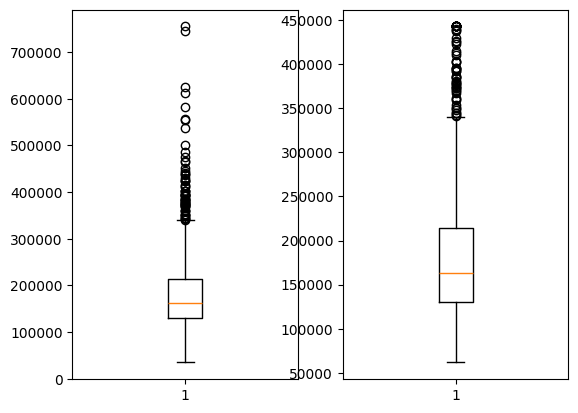

In [11]:
plt.figure(figsize=(10, 8))

fig, axes = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = axes.flatten()
ax1.boxplot(df["SalePrice"])
ax2.boxplot(df_copy["SalePrice"])

**Trimming**

In [12]:
df_copy = df.copy()
print(f"Number of records in the table: {df_copy.shape}")

index = df_copy[(df_copy["SalePrice"] > upper_whisker) | (df_copy["SalePrice"] < lower_whisker)].index

# removing outliers
df_copy.drop(index, inplace = True)
print(f"Number of records in the table: {df_copy.shape}")


# new_df = df[(df["SalePrice"]>lower_whisker) & (df["SalePrice"]<upper_whisker)]



Number of records in the table: (1460, 2)
Number of records in the table: (1399, 2)


**Log Transformation**

- Transformation of the skewed variables may also help correct the distribution of the variables.
- These could be logarithmic, square root, or square transformations.
- The most common is the logarithmic transformation

In [13]:
print(f"Skewness of data before : {df["SalePrice"].skew().round(2)}")

# log transformation 
df["log"] = df["SalePrice"].map(lambda i : np.log(i) if i >0 else 0)

print(f"Skewness of data after : {df["log"].skew().round(2)}")


Skewness of data before : 1.88
Skewness of data after : 0.12


(array([  3.,   2.,   0.,   2.,   3.,   7.,   5.,  10.,  39.,  35.,  49.,
        100., 138., 186., 146., 156., 142., 102., 100.,  68.,  52.,  44.,
         22.,  24.,  12.,   4.,   3.,   3.,   1.,   2.]),
 array([10.46024211, 10.56271647, 10.66519084, 10.7676652 , 10.87013956,
        10.97261393, 11.07508829, 11.17756266, 11.28003702, 11.38251138,
        11.48498575, 11.58746011, 11.68993448, 11.79240884, 11.8948832 ,
        11.99735757, 12.09983193, 12.2023063 , 12.30478066, 12.40725502,
        12.50972939, 12.61220375, 12.71467812, 12.81715248, 12.91962684,
        13.02210121, 13.12457557, 13.22704994, 13.3295243 , 13.43199866,
        13.53447303]),
 <BarContainer object of 30 artists>)

<Figure size 1000x1000 with 0 Axes>

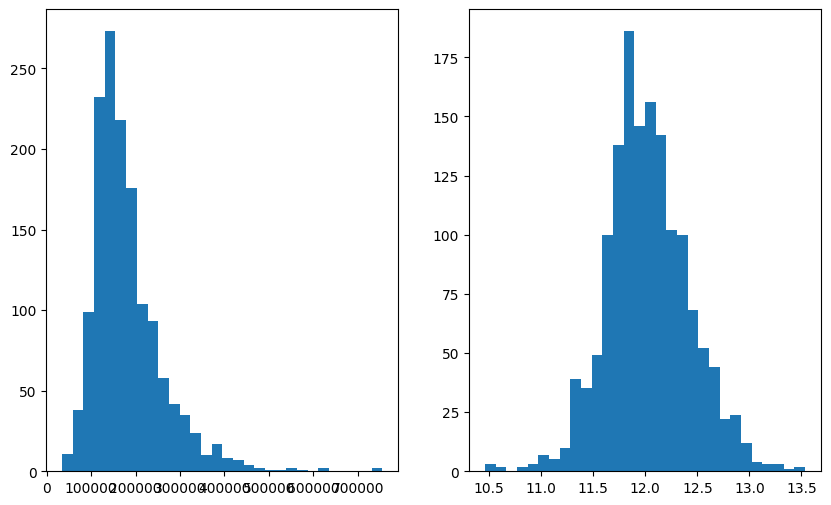

In [14]:
plt.figure(figsize=(10, 10))

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 6))
ax1, ax2 = axes.flatten()
ax1.hist(df["SalePrice"], bins=30)
ax2.hist(df["log"],bins=30)

**Z Scores for outlier detection:** 

- Z-Score, also known as standard score, measures the number of standard deviations a particular data point is from the mean of a distribution.
-  Z-Score method operates optimally when applied to data conforming to a normal distribution.
-  In instances where data diverges from the normal distribution, such as skewed or bimodal distributions, the Z-Score method may not perform as effectively.

